In [ ]:
# 2020-05
# the infamous "cubic model" is exp(cubic)
# to be clear, this is still bad

In [45]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

xy = [[0.41269295796165295, 142.2538249053705],[0.4440049517615684, 245.61569327513917],[0.45953795790025864, 288.0694363607936],[0.4936665422750124, 406.0735140805118],[0.4993952560628988, 470.7938122131318],[0.5221178442696203, 570.6034286104268],[0.536521161940626, 651.9586628092629],[0.5537565957422647, 798.6580052432037],[0.5601285385940616, 867.9529107940334],[0.5800266052144705, 1021.5661485304954],[0.5872932743106921, 1074.4600468035396],[0.6054352999739221, 1245.0981019202682],[0.6116295229352734, 1326.19341524307],[0.6292781864680762, 1493.5824594093656],[0.6352448306001829, 1559.3424410461248],[0.6478950222182268, 1700.7134055213546],[0.6567129971587649, 1770.6581132622714],[0.6748249439173677, 1998.5220812526222],[0.6885913372780289, 2157.420376801787],[0.6946845170931981, 2240.075215380796],[0.736520602618604, 2594.0874485399495],[0.7472457334682766, 2680.381179383444],[0.7753800353376051, 2826.9245692917634],[0.7900632215801711, 2845.9507774174976],[0.8227112303129358, 2806.405672706517],[0.8363280560127688, 2764.0757014665937],[0.8334627978675218, 2729.766145830024],[0.8572632225502452, 2592.917804597797],[0.8661396466420104, 2532.486200919748],[0.8774695428666135, 2386.076484604819],[0.888118882773304, 2308.4344057779062],[0.8973068222324134, 2151.4050650992767],[0.904868257727304, 2071.473207126345],[0.9285106029313297, 1849.500778992779],[0.939464010722368, 1659.1520574434267],[0.9407386203997139, 1591.3127087983908],[0.955390963819881, 1440.905161866358],[0.958920151770098, 1370.4839325193784],[0.9638861185544976, 1326.1934152430795],[0.9744328684053611, 1197.8502626766513],[0.9780333606883655, 1110.4590881343447],[0.9920525637184769, 960.1786136305964],[0.9997789924816978, 894.7247610256109]]
x = np.array([pair[0] for pair in xy])
y = np.array([pair[1] for pair in xy])

tailxy = [[1.0219952456892238, 669.7372507300433],[1.0340517770650697, 554.22841342026],[1.0482512917745619, 451.5596673865848],[1.0645893642446302, 352.1584980802036],[1.0830642263060504, 252.20035546803138],[1.1036834942476188, 168.15927221683796],[1.12787432096737, 105.34506050847358],[1.1549231157107103, 61.07187129057638],[1.1819776223845362, 29.153587713525667],[1.2090428759794658, 20.48089448317205],[1.2382460018117576, 13.592991268254991],[1.26745159106428, 12.033466012048848],[1.2955902189398671, 13.852912144290713],[1.32429637076984, 10.577909106255902],[1.3515070943363359, 8.394573747566028],[1.3835606377090712, 3.7159979789439603]]
tailx = np.array([pair[0] for pair in tailxy])
taily = np.array([pair[1] for pair in tailxy])

allx = np.append(x,tailx)
ally = np.append(y,taily)


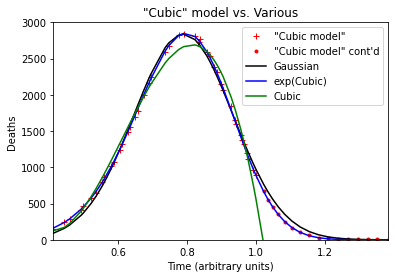

In [53]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def Gauss3(x, a, x0, sigma, b):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2) + b * (x - 1.)**3)

def Cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt3,pcov3 = curve_fit(Gauss3, x, y, p0=[1., 0., 1., .1])

poptC,pcovC = curve_fit(Cubic, x, y, p0=[-1., 0., 0., 0.])

popt,pcov = curve_fit(Gauss, x, y, p0=[1., 0., 1.])

plt.plot(x, y, 'r+', label='"Cubic model"')
plt.plot(tailx, taily, 'r.', label='"Cubic model" cont\'d')
plt.plot(allx, Gauss(allx, *popt), 'k-', label='Gaussian')
plt.plot(allx, Gauss3(allx, *popt3), 'b-', label='exp(Cubic)')
plt.plot(allx, Cubic(allx, *poptC), 'g-', label='Cubic')
plt.legend()
plt.title('"Cubic" model vs. Various')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Deaths')
axes = plt.gca()
axes.set_xlim([x[0],tailx[-1]])
axes.set_ylim([0., 3000.])
plt.show()

In [39]:
np.append(x,tailx)

array([0.41269296, 0.44400495, 0.45953796, 0.49366654, 0.49939526,
       0.52211784, 0.53652116, 0.5537566 , 0.56012854, 0.58002661,
       0.58729327, 0.6054353 , 0.61162952, 0.62927819, 0.63524483,
       0.64789502, 0.656713  , 0.67482494, 0.68859134, 0.69468452,
       0.7365206 , 0.74724573, 0.77538004, 0.79006322, 0.82271123,
       0.83632806, 0.8334628 , 0.85726322, 0.86613965, 0.87746954,
       0.88811888, 0.89730682, 0.90486826, 0.9285106 , 0.93946401,
       0.94073862, 0.95539096, 0.95892015, 0.96388612, 0.97443287,
       0.97803336, 0.99205256, 0.99977899, 1.02199525, 1.03405178,
       1.04825129, 1.06458936, 1.08306423, 1.10368349, 1.12787432,
       1.15492312, 1.18197762, 1.20904288, 1.238246  , 1.26745159,
       1.29559022, 1.32429637, 1.35150709, 1.38356064])

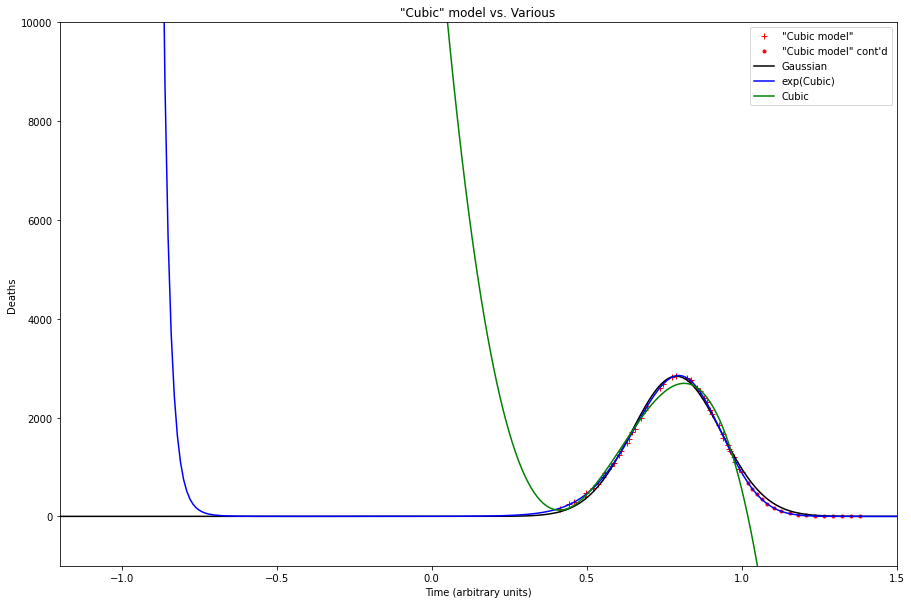

In [95]:

plt.figure(figsize=(15,10)).patch.set_facecolor('white')
plt.plot(x, y, 'r+', label='"Cubic model"')
plt.plot(tailx, taily, 'r.', label='"Cubic model" cont\'d')
plt.plot(longx, Gauss(longx, *popt), 'k-', label='Gaussian')
longx = np.arange(-3.,3.,.01)
plt.plot(longx, Gauss3(longx, *popt3), 'b-', label='exp(Cubic)')
plt.plot(longx, Cubic(longx, *poptC), 'g-', label='Cubic')
plt.legend()
plt.title('"Cubic" model vs. Various')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Deaths')
axes = plt.gca()
axes.set_xlim([-1.2,1.5])
axes.set_ylim([-1e3, 1e4])
plt.show()


In [55]:
popt3

array([ 2.57319764e+03,  8.25035840e-01,  1.19956889e-01, -1.55219106e+01])

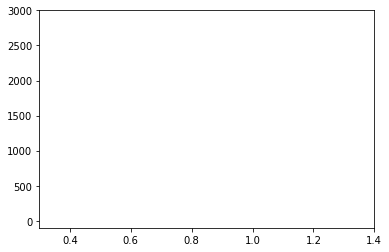

In [89]:

axes = plt.gca()
axes.set_xlim([.3, 1.4])
axes.set_ylim([-100., 3000.])
plt.show()